# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing and Exploring the Data

In [2]:
df = pd.read_csv('training.csv', delimiter="\t")
df.head()

,DepartureDate,DepartureYear,DepartureMonth,DepartureDay,FlightNumber,DepartureAirport,ArrivalAirport,Route,ActualFlightTime,ActualTotalFuel,ActualTOW,FLownPassengers,BagsCount,FlightBagsWeight
0,01/10/2016,2016,10,1,1145,MAN,SXF,MAN-SXF,91,3660,64016,175,61,440
1,01/10/2016,2016,10,1,1160,CTA,FCO,CTA-FCO,68,3280,66138,182,27,350
2,01/10/2016,2016,10,1,1183,LGW,SNN,LGW-SNN,64,2720,58447,127,(null),(null)
3,01/10/2016,2016,10,1,1220,ATH,CHQ,ATH-CHQ,35,1682,60587,163,12,150
4,01/10/2016,2016,10,1,1225,CHQ,ATH,CHQ-ATH,34,1877,63090,178,37,490


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29731 entries, 0 to 29730
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   DepartureDate     29731 non-null  object
 1   DepartureYear     29731 non-null  int64 
 2   DepartureMonth    29731 non-null  int64 
 3   DepartureDay      29731 non-null  int64 
 4   FlightNumber      29731 non-null  int64 
 5   DepartureAirport  29731 non-null  object
 6   ArrivalAirport    29731 non-null  object
 7   Route             29731 non-null  object
 8   ActualFlightTime  29731 non-null  int64 
 9   ActualTotalFuel   29731 non-null  int64 
 10  ActualTOW         29731 non-null  object
 11  FLownPassengers   29731 non-null  object
 12  BagsCount         29731 non-null  object
 13  FlightBagsWeight  29731 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.2+ MB


# Data Cleaning

Replacing invalid string values like '(null)' with *np.nan*. Using median imputation for missing values in BagsCount and FlownPassengers and
mean imputation to fill missing values in FlightBagsWeight. Removing Rows with Missing Values for ActualTOW.

In [4]:
df = df.rename({"FLownPassengers" : "FlownPassengers"}, axis = 1)

In [5]:
df['ActualTOW'] = df['ActualTOW'].replace('(null)', np.nan)

In [6]:
df['BagsCount'] = df['BagsCount'].replace('(null)', np.nan)

In [7]:
df['FlightBagsWeight'] = df['FlightBagsWeight'].replace('(null)', np.nan)

In [8]:
df['FlownPassengers'] = df['FlownPassengers'].replace('(null)', np.nan)

In [9]:
df = df.astype({'ActualTOW' : 'float', 'BagsCount' : 'float', 'FlightBagsWeight' : 'float', 'FlownPassengers' : 'float'})

In [10]:
df = df.dropna(subset=['ActualTOW'])

In [11]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='median')
df[['BagsCount', 'FlownPassengers']] = imp.fit_transform(df[['BagsCount', 'FlownPassengers']])

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df['FlightBagsWeight'] = imp.fit_transform(df[['FlightBagsWeight']])

# Data Preprocessing
Splitting data into training set and testing set, visualizng the distribution of each feature and correlations between features. Using PowerTransformer to make skewed data more normally distributed. It stabilizes variance and improves model performance for non-normal distributions. Using StandardScaler to ensure all features contribute equally, which is crucial for many machine learning algorithms.

In [12]:
X = df.drop('ActualTOW', axis = 1)
y = df['ActualTOW']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
train_data = X_train.join(y_train)

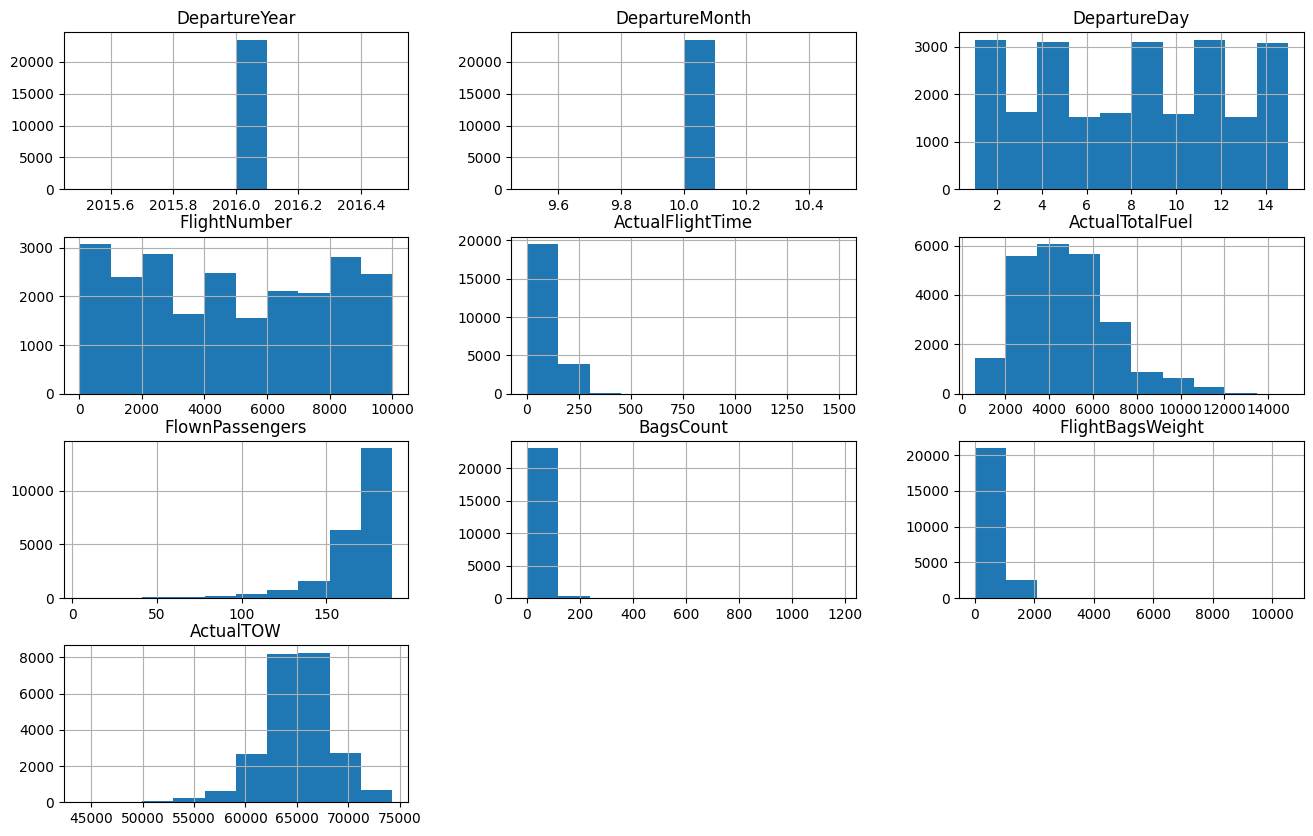

In [16]:
train_data.hist(figsize=(16,10))
plt.show()

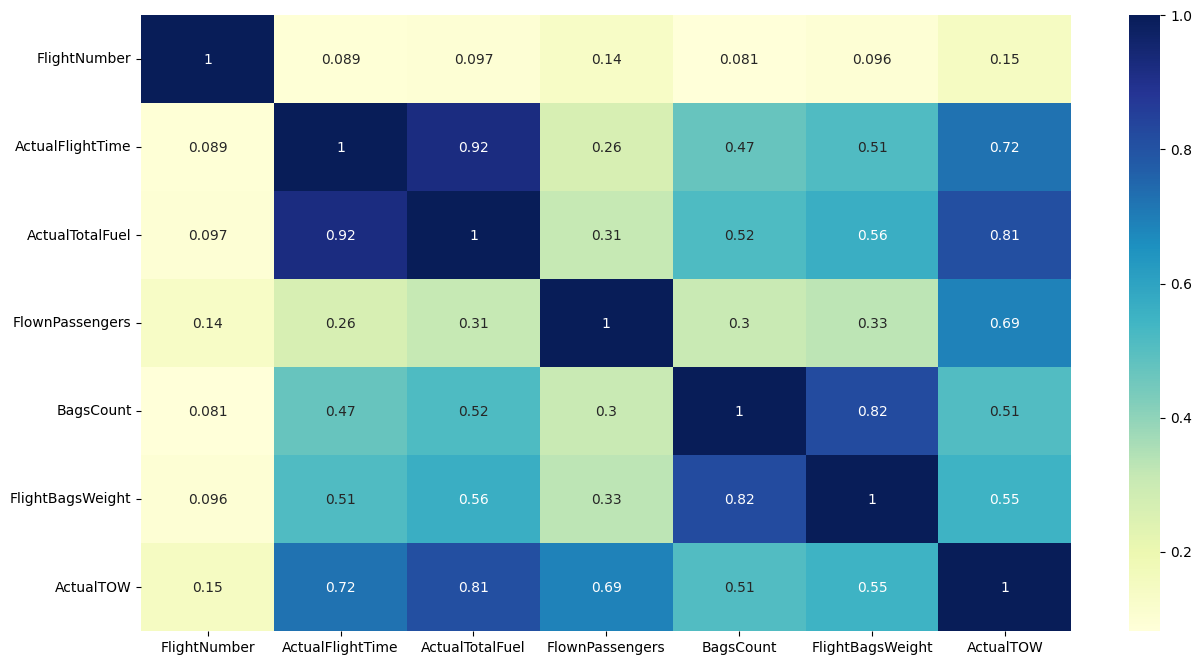

In [17]:
train_data_numeric = train_data.select_dtypes(include=['number']).drop(columns=['DepartureDay', 'DepartureMonth', 'DepartureYear'])

plt.figure(figsize=(15,8))
sns.heatmap(train_data_numeric.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [18]:
from sklearn.preprocessing import PowerTransformer

In [19]:
pt = PowerTransformer(method='yeo-johnson')
train_data[['FlownPassengers', 'ActualTotalFuel', 'ActualFlightTime', 'FlightBagsWeight']] = pt.fit_transform(train_data[['FlownPassengers', 'ActualTotalFuel', 'ActualFlightTime', 'FlightBagsWeight']])

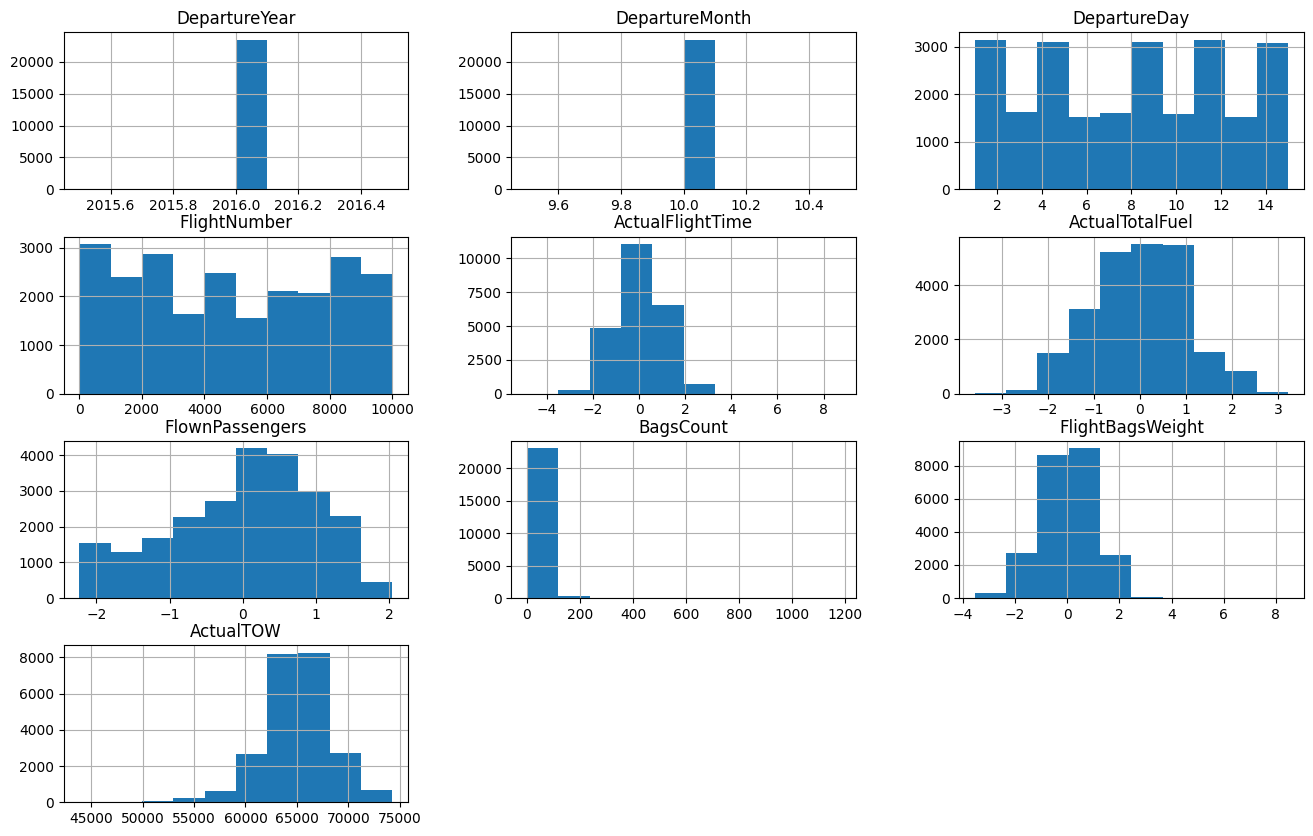

In [20]:
train_data.hist(figsize=(16, 10))
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
# Encoding categorical features 'DepartureAirport' and 'ArrivalAirport' into numerical values
# Using LabelEncoder instead of OneHotEncoder due to the high number of categories (189 unique categories)
le = LabelEncoder()
train_data['DepartureAirport'] = le.fit_transform(train_data['DepartureAirport'])
train_data['ArrivalAirport'] = le.fit_transform(train_data['ArrivalAirport'])

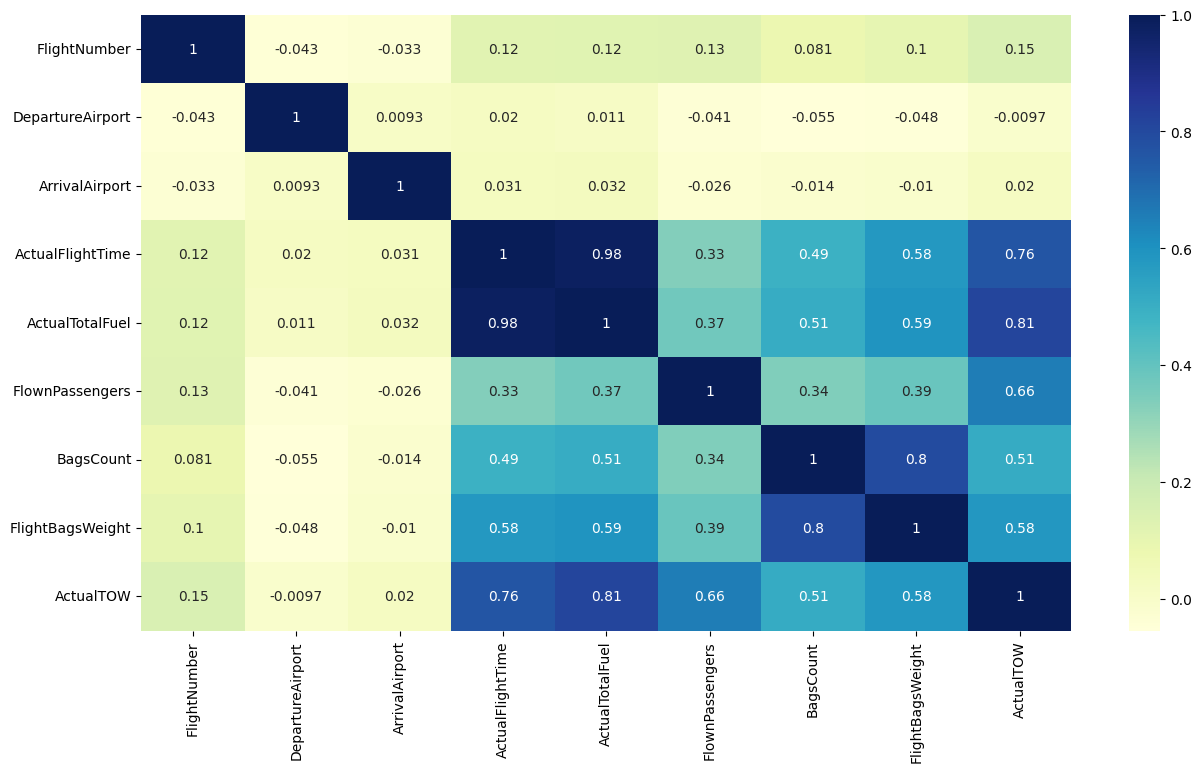

In [23]:
train_data_numeric = train_data.select_dtypes(include=['number']).drop(columns=['DepartureDay', 'DepartureMonth', 'DepartureYear'])

plt.figure(figsize=(15,8))
sns.heatmap(train_data_numeric.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [24]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder

def preprocess(X):
  data = X.join(y)
  pt = PowerTransformer(method='yeo-johnson')
  data[['FlownPassengers', 'ActualTotalFuel', 'ActualFlightTime', 'FlightBagsWeight']] = pt.fit_transform(data[['FlownPassengers', 'ActualTotalFuel', 'ActualFlightTime', 'FlightBagsWeight']])

  data = data.drop(['Route','DepartureDay', 'DepartureMonth', 'DepartureYear', 'DepartureDate'], axis = 1)

  data['DepartureAirport'] = le.fit_transform(data['DepartureAirport'])
  data['ArrivalAirport'] = le.fit_transform(data['ArrivalAirport'])

  X = data.drop('ActualTOW', axis = 1)
  return X

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
sc = StandardScaler()

X_train = train_data.drop(['Route', 'DepartureDay', 'DepartureMonth', 'DepartureYear', 'DepartureDate', 'ActualTOW'], axis = 1)
X_train = sc.fit_transform(X_train)

y_train = train_data['ActualTOW']

In [27]:
X_test = preprocess(X_test)
X_test = sc.transform(X_test)

# Training Models and Visualizing the Results
Training three regression models:

- Linear Regression

- Random Forest Regressor

- Support Vector Regressor (SVR)

To evaluate their performance, I used two regression metrics: RMSE and $R^2$ score and visualized results


In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [31]:
param_grid = {
    'n_estimators': [90, 100, 120],
    'max_features': [2, 4, 6],
}

forest = RandomForestRegressor()

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6],
                         'n_estimators': [90, 100, 120]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [32]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 120}

In [48]:
forest = RandomForestRegressor(n_estimators=120, max_features=4)
forest.fit(X_train, y_train)

RandomForestRegressor(max_features=4, n_estimators=120)

In [49]:
from sklearn.svm import SVR

In [50]:
sc_y = StandardScaler()
y_train_SVR = sc_y.fit_transform(y_train.values.reshape(len(y_train), 1))

In [51]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train_SVR)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

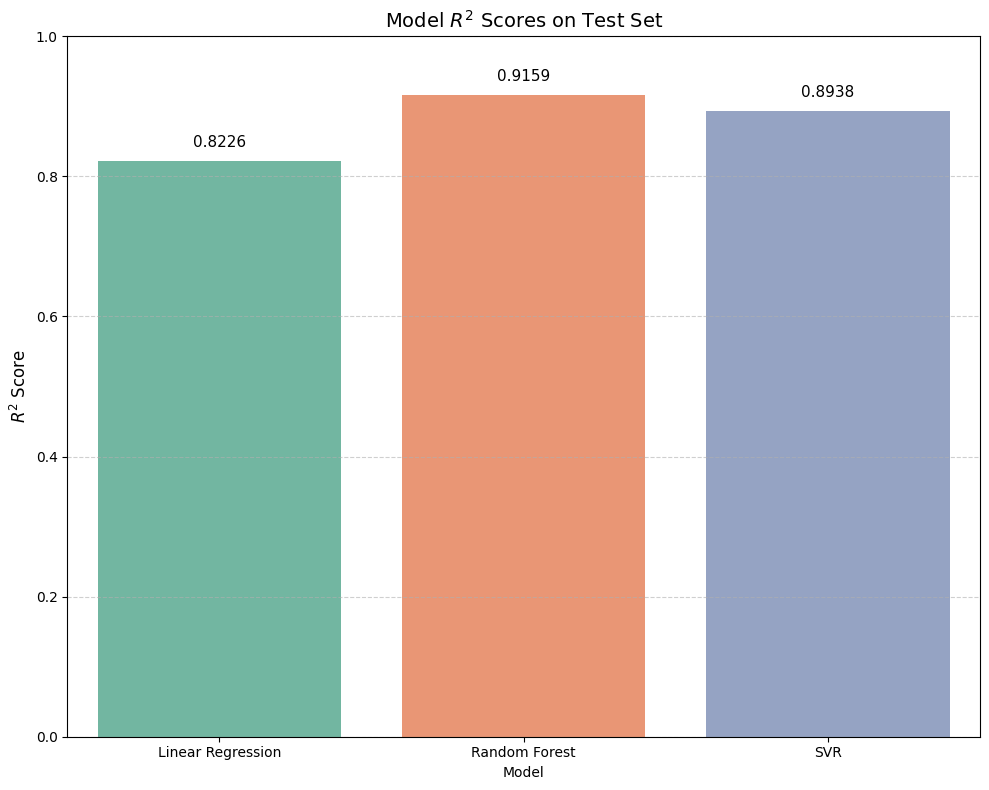

In [52]:
model_names = ['Linear Regression', 'Random Forest', 'SVR']
scores = [
    lm.score(X_test, y_test),
    forest.score(X_test, y_test),
    regressor.score(X_test, sc_y.transform(y_test.values.reshape(len(y_test), 1)))
]
df_scores = pd.DataFrame({'Model': model_names, 'Score': scores})


plt.figure(figsize=(10, 8))
sns.barplot(data=df_scores, x='Model', y='Score', hue='Model', palette='Set2', legend=False)


for i, score in enumerate(scores):
    plt.text(i, score + 0.02, f'{score:.4f}', ha='center', fontsize=11)

plt.title(r'Model $R^2$ Scores on Test Set', fontsize=14)
plt.ylabel(r'$R^2$ Score', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

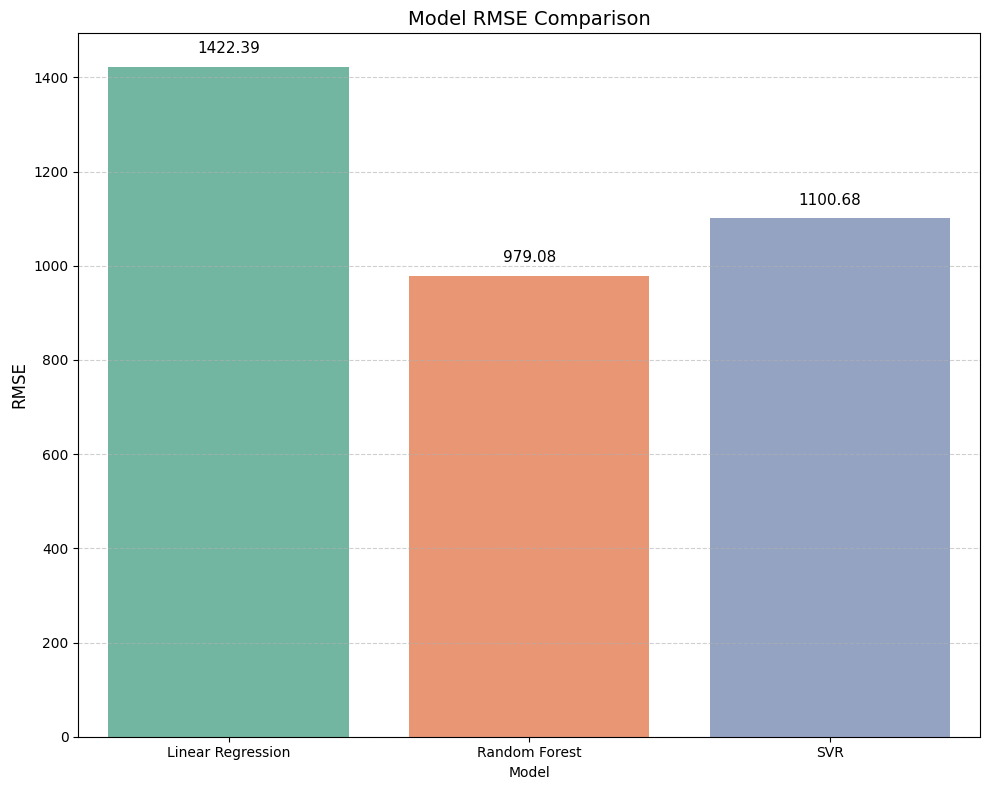

In [53]:
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_lm = lm.predict(X_test)
y_pred_forest = forest.predict(X_test)
y_pred_svr = sc_y.inverse_transform(regressor.predict(X_test).reshape(-1, 1))

rmse_scores = [
    np.sqrt(mean_squared_error(y_test, y_pred_lm)),
    np.sqrt(mean_squared_error(y_test, y_pred_forest)),
    np.sqrt(mean_squared_error(y_test, y_pred_svr))
]

model_names = ['Linear Regression', 'Random Forest', 'SVR']
df_rmse = pd.DataFrame({'Model': model_names, 'RMSE': rmse_scores})

plt.figure(figsize=(10, 8))
sns.barplot(data=df_rmse, x='Model', y='RMSE', hue='Model', palette='Set2', legend=False)

for i, score in enumerate(rmse_scores):
    plt.text(i, score + 0.02 * max(rmse_scores), f'{score:.2f}', ha='center', fontsize=11)

plt.title(r'Model RMSE Comparison', fontsize=14)
plt.ylabel('RMSE', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Predicting on the Validation Set Using the Best Model
Prediciting results for validation set using RandomForrestRegressor which achieved the best performance during training.

In [54]:
df_val = pd.read_csv('validation.csv', delimiter="\t")
df_val.head()

,DepartureDate,DepartureYear,DepartureMonth,DepartureDay,FlightNumber,DepartureAirport,ArrivalAirport,Route,ActualFlightTime,ActualTotalFuel,FLownPassengers,BagsCount,FlightBagsWeight
0,01/11/2016,2016,11,1,6003,MRS,BES,MRS-BES,84,3630,185,43,560
1,01/11/2016,2016,11,1,6004,BES,MRS,BES-MRS,86,3690,188,(null),(null)
2,01/11/2016,2016,11,1,6542,MRS,STN,MRS-STN,100,4390,168,55,720
3,01/11/2016,2016,11,1,6541,STN,MRS,STN-MRS,100,4690,185,35,460
4,01/11/2016,2016,11,1,5542,STN,REU,STN-REU,112,4900,167,31,400


In [55]:
df_val = df_val.rename({"FLownPassengers" : "FlownPassengers"}, axis = 1)
df_val['BagsCount'] = df_val['BagsCount'].replace('(null)', np.nan)
df_val['FlightBagsWeight'] = df_val['FlightBagsWeight'].replace('(null)', np.nan)
df_val['FlownPassengers'] = df_val['FlownPassengers'].replace('(null)', np.nan)

df_val = df_val.astype({'BagsCount' : 'float', 'FlightBagsWeight' : 'float', 'FlownPassengers' : 'float'})

imp = SimpleImputer(missing_values=np.nan, strategy='median')
df_val[['BagsCount', 'FlownPassengers']] = imp.fit_transform(df_val[['BagsCount', 'FlownPassengers']])
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df_val['FlightBagsWeight'] = imp.fit_transform(df_val[['FlightBagsWeight']])

In [56]:
X_val = preprocess(df_val)

In [57]:
X_val_s = sc.transform(X_val)

In [58]:
y_val = forest.predict(X_val_s)

In [59]:
y_val = pd.DataFrame({"ActualTOW":y_val})

In [60]:
df_val["ActualTOW"] = y_val

In [61]:
df_val

,DepartureDate,DepartureYear,DepartureMonth,DepartureDay,FlightNumber,DepartureAirport,ArrivalAirport,Route,ActualFlightTime,ActualTotalFuel,FlownPassengers,BagsCount,FlightBagsWeight,ActualTOW
0,01/11/2016,2016,11,1,6003,MRS,BES,MRS-BES,84,3630,185.0,43.0,560.000000,65219.375000
1,01/11/2016,2016,11,1,6004,BES,MRS,BES-MRS,86,3690,188.0,31.0,446.149087,65147.516667
2,01/11/2016,2016,11,1,6542,MRS,STN,MRS-STN,100,4390,168.0,55.0,720.000000,65622.550000
3,01/11/2016,2016,11,1,6541,STN,MRS,STN-MRS,100,4690,185.0,35.0,460.000000,67590.525000
4,01/11/2016,2016,11,1,5542,STN,REU,STN-REU,112,4900,167.0,31.0,400.000000,65709.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1873,01/11/2016,2016,11,1,2062,PMI,MAD,PMI-MAD,60,2775,173.0,12.0,160.000000,63390.741667
1874,01/11/2016,2016,11,1,6423,BLQ,VLC,BLQ-VLC,99,4120,183.0,21.0,270.000000,65428.733333
1875,01/11/2016,2016,11,1,6422,VLC,BLQ,VLC-BLQ,104,4230,182.0,31.0,400.000000,65173.275000
1876,01/11/2016,2016,11,1,4316,BRI,BLQ,BRI-BLQ,59,2671,169.0,10.0,130.000000,62817.608333


In [62]:
df_val.to_csv('validation_predicted.csv', index=False)